# Laboratorio 3

In [84]:
import pickle
import numpy as np

from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#### Establecimiento de conjuntos de entrenamiento, validacion y prueba

In [23]:
# Funcion para cargar los archivos .p
def load_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data

# Cargar los tres archivos
validacion = load_data('./Datos_Rotulos_Trafico/validacion.p')
prueba = load_data('./Datos_Rotulos_Trafico/prueba.p')
entrenamiento = load_data('./Datos_Rotulos_Trafico/entrenamiento.p')

# Extraer las caracteristicas y etiquetas
X_train = entrenamiento['features']
y_train = entrenamiento['labels']

X_val = validacion['features']
y_val = validacion['labels']

X_test = prueba['features']
y_test = prueba['labels']

# Verificar las formas de los arrays
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_val shape: (4410, 32, 32, 3)
y_val shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


In [24]:
# Numero de clases
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  43
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


#### Preprocesamiento y normalización de las imágenes

In [25]:
# Normalizar los datos (suponiendo que las caracteristicas son imagenes en escala de grises o RGB)
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [26]:
# One Hot Encoding Labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#### Modelo

In [51]:
def createModel():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model


In [73]:
model1 = createModel()
batch_size = 256
epochs = 20
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 43)             │         3,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,811 (253.17 KB)

 Trainable params: 64,811 (253.17 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history = model1.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.2044 - loss: 3.1486 - val_accuracy: 0.5703 - val_loss: 1.4704
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7144 - loss: 1.0298 - val_accuracy: 0.7789 - val_loss: 0.7919
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8608 - loss: 0.5341 - val_accuracy: 0.8238 - val_loss: 0.6398
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9060 - loss: 0.3693 - val_accuracy: 0.8503 - val_loss: 0.5339
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9301 - loss: 0.2755 - val_accuracy: 0.8503 - val_loss: 0.5567
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9468 - loss: 0.2153 - val_accuracy: 0.8791 - val_loss: 0.4464
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.9573 - loss: 0.1791 - val_accuracy: 0.8857 - val_loss: 0.4377
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.9683 - loss: 0.1323 - val_accu

Text(0.5, 1.0, 'Accuracy Curves')

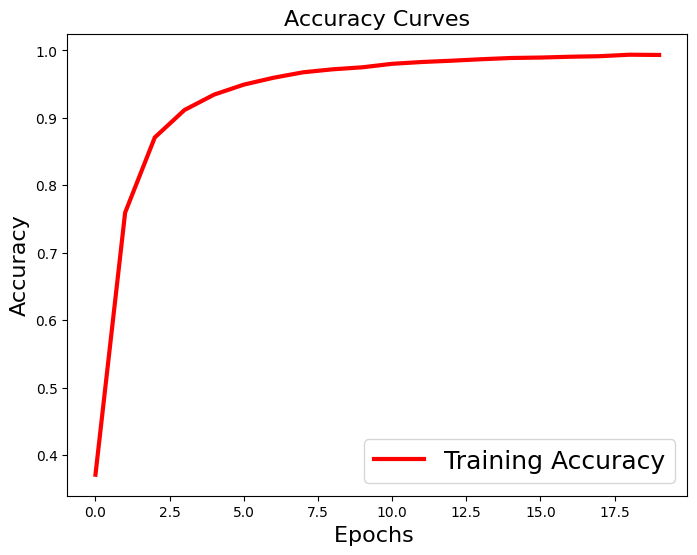

In [75]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

#### Test

In [76]:
predictions = model1.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [78]:
accuracy = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
precision = precision_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
recall = recall_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
f1 = f1_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9084718923198734
Precision: 0.9118685228737134
Recall: 0.9084718923198734
F1: 0.9075428202149773


#### Experimentacion de mejoras

Aumento de epocas

In [79]:
model2 = createModel()
batch_size = 256
epochs = 30
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

history = model2.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.1952 - loss: 3.2083 - val_accuracy: 0.5195 - val_loss: 1.7103
Epoch 2/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.6827 - loss: 1.1596 - val_accuracy: 0.7435 - val_loss: 0.9691
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.8418 - loss: 0.6064 - val_accuracy: 0.7975 - val_loss: 0.7683
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.8924 - loss: 0.4095 - val_accuracy: 0.8045 - val_loss: 0.7260
Epoch 5/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9163 - loss: 0.3133 - val_accuracy: 0.8365 - val_loss: 0.6390
Epoch 6/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9370 - loss: 0.2515 - val_accuracy: 0.8293 - val_loss: 0.6946
Epoch 7/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9512 - loss: 0.1957 - val_accuracy: 0.8628 - val_loss: 0.5528
Epoch 8/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9594 - loss: 0.1631 - val_accuracy: 0.867

Text(0.5, 1.0, 'Accuracy Curves')

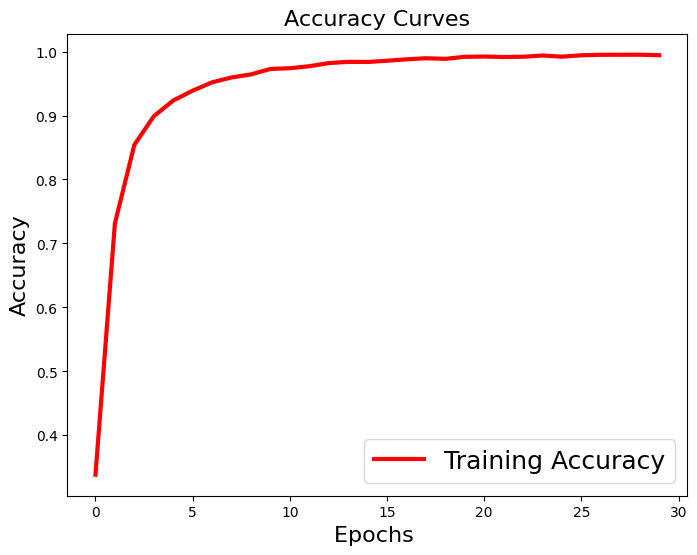

In [80]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [88]:
predictions = model2.predict(X_test)
accuracy = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
precision = precision_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
recall = recall_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
f1 = f1_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy: 0.8996041171813143
Precision: 0.9049456096951267
Recall: 0.8996041171813143
F1: 0.8994761599839808


Cambios en capas de modelo

In [82]:
def createModel():
    model = Sequential()

    # Primera capa convolucional
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucional
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Tercera capa convolucional (opcional)
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Capas fully connected
    model.add(Flatten())
    model.add(Dense(120, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(84, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))

    return model

In [93]:
model3 = createModel()
batch_size = 256
epochs = 20
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

history = model3.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val)
)

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.1718 - loss: 5.2127 - val_accuracy: 0.0717 - val_loss: 4.5100
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 52s 384ms/step - accuracy: 0.7019 - loss: 1.9448 - val_accuracy: 0.3084 - val_loss: 3.2966
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 25s 187ms/step - accuracy: 0.8798 - loss: 0.9562 - val_accuracy: 0.6138 - val_loss: 1.9265
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 27s 201ms/step - accuracy: 0.9359 - loss: 0.6051 - val_accuracy: 0.9102 - val_loss: 0.7122
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 26s 191ms/step - accuracy: 0.9587 - loss: 0.4463 - val_accuracy: 0.9549 - val_loss: 0.4570
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.9699 - loss: 0.3669 - val_accuracy: 0.9680 - val_loss: 0.3704
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9748 - loss: 0.3193 - val_accuracy: 0.9735 - val_loss: 0.3124
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 27s 195ms/step - accuracy: 0.9796 - loss: 0

Text(0.5, 1.0, 'Accuracy Curves')

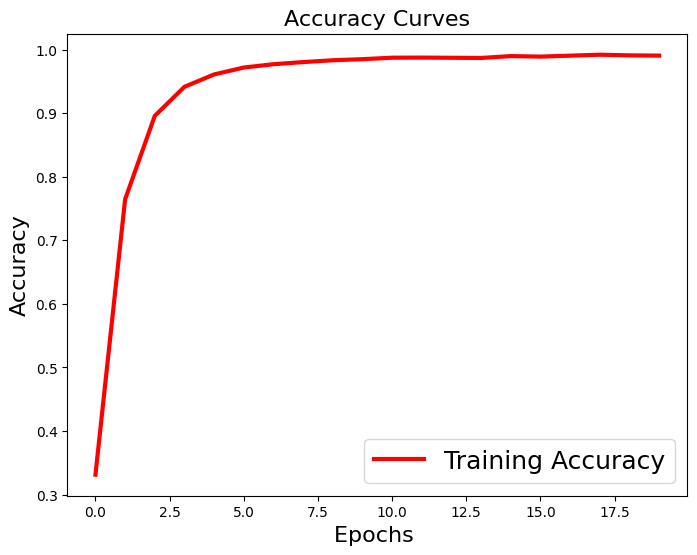

In [94]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [95]:
predictions = model3.predict(X_test)
accuracy = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
precision = precision_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
recall = recall_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
f1 = f1_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step
Accuracy: 0.9495645288994458
Precision: 0.9519279421729684
Recall: 0.9495645288994458
F1: 0.9484944612211307
